# Filippo Conforto - RLab 07

In [7]:
library(tidyverse, quiet = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [18]:
find_ci95 = function (pos) {
    low = uniroot(function(y){integrate(pos,0,y)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [61]:
find_median = function (pos, lower, upper) {
    median = uniroot(function(y){integrate(pos,0,y)[[1]] - 0.5}, lower = lower, upper = upper)$root
    return(median)
    ## Valutare di usare qgamma
}

## Exercise 1

Binomial distribution

The frequentist estimator is 6/75

In [1]:
alfa = ((1-0.15)/sqrt(0.14)^2-1/0.15)*0.15^2
beta = alfa*(1/0.15 - 1)
prior = function(x) dbeta(x,shape1 = alfa, shape2 = beta)
posterior = function(x) dbeta(x,shape1 = alfa +6, shape2 = beta+75-6)

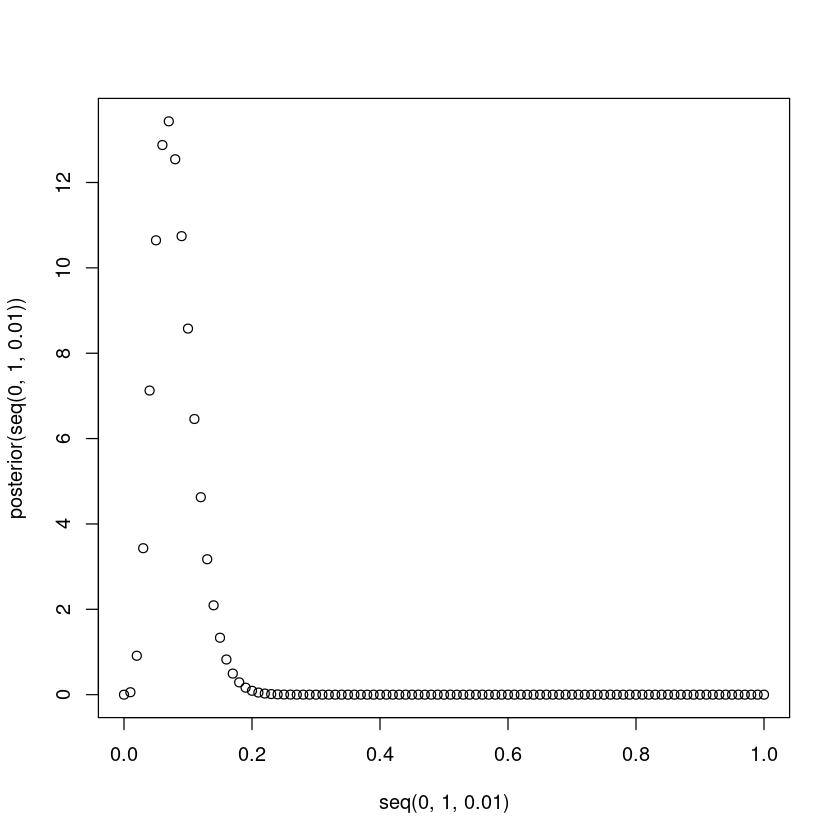

In [15]:
plot(seq(0,1,0.01), posterior(seq(0,1,0.01)))

In [16]:
message("mean ", (alfa +6)/(alfa + beta+75))

mean 0.0799165673420739



In [17]:
message("variance ", (alfa +6)*(beta+75-6)/((alfa + beta+75)*(alfa + beta+75)*(alfa + beta+76)))

variance 0.00096863677674775



In [39]:
1-pbeta(0.15,shape1 = alfa +6, shape2 = beta+75-6)

[1] 0.02580846

The probability is less than 5% so we can reject

In [41]:
pbinom(6,75,0.15)

[1] 0.0543533

In [1]:
binom.test(6,75,0.15, "less")


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


The p-value is higher than 5% so we cannot reject the null hypothesis

## Exercise 2

In [55]:
posterior1 = function(x){
    dgamma(x,123,200)
}
posterior2 = function(x){
    dgamma(x,197,280)
}

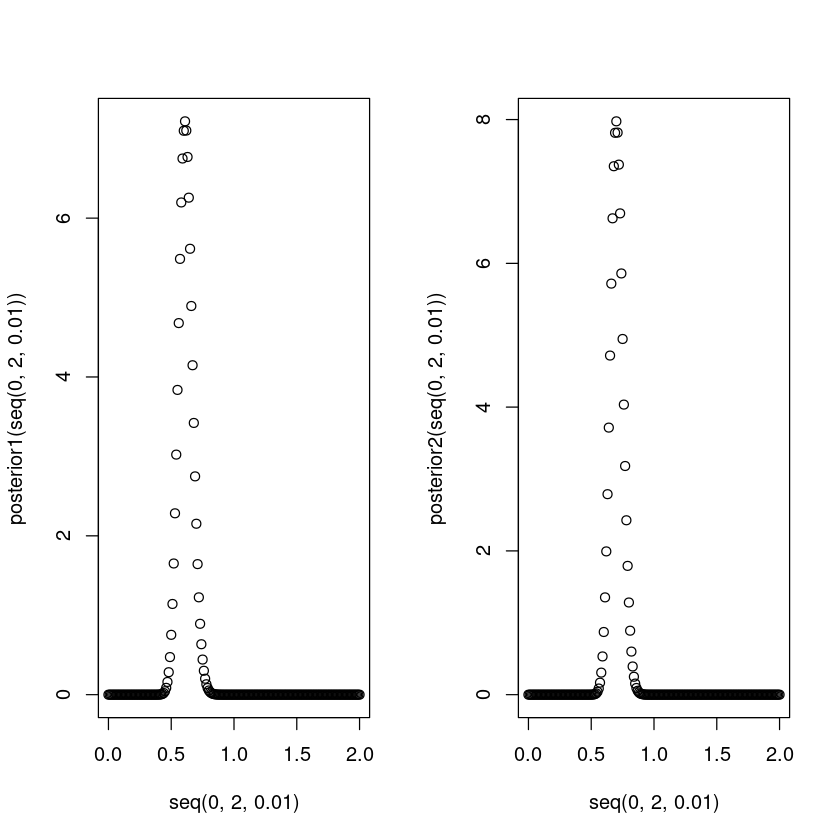

In [56]:
layout(matrix(1:2, nrow=1, ncol = 2, byrow = TRUE))
plot(seq(0,2,0.01), posterior1(seq(0,2,0.01)))
plot(seq(0,2,0.01), posterior2(seq(0,2,0.01)))

In [57]:
message("mean1 ", 123/200)
message("mean2 ", 197/280)

mean1 0.615

mean2 0.703571428571429



In [58]:
message("variance1 ",123/200^2)
message("variance2 ",197/280^2)

variance1 0.003075

variance2 0.00251275510204082



In [59]:
find_ci95(posterior1)
find_ci95(posterior2)

[1] 0.5110981 0.7283407

In [64]:
find_median(posterior1,0,8)
find_median(posterior2,0,8)

[1] 0.6133137

[1] 0.7023813

In [65]:
posterior3 = function(x){
    dgamma(x,122.5,200)
}
posterior4 = function(x){
    dgamma(x,196.5,280)
}

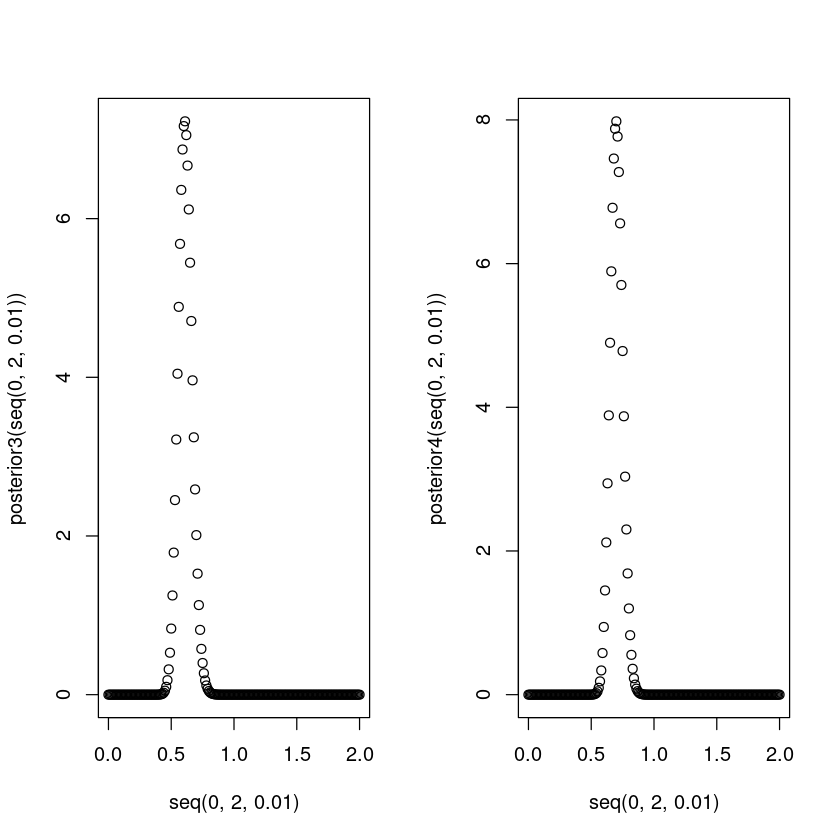

In [66]:
layout(matrix(1:2, nrow=1, ncol = 2, byrow = TRUE))
plot(seq(0,2,0.01), posterior3(seq(0,2,0.01)))
plot(seq(0,2,0.01), posterior4(seq(0,2,0.01)))

In [67]:
message("mean1 ", 122.5/200)
message("mean2 ", 196.5/280)

mean1 0.6125

mean2 0.701785714285714



In [68]:
message("variance1 ",122.5/200^2)
message("variance2 ",196.5/280^2)

variance1 0.0030625

variance2 0.00250637755102041



In [70]:
find_ci95(posterior3)
find_ci95(posterior4)

[1] 0.5088637 0.7255932

[1] 0.6070759 0.8032461

In [71]:
find_median(posterior3,0,8)
find_median(posterior4,0,8)

[1] 0.6108322

[1] 0.7005956

## Exercise 3

In [73]:
message("Estimator ", 11/116)

Estimator 0.0948275862068965



In [76]:
posterior = function(x){
    dbeta(x,shape1 = 1 + 11, shape2 = 10+116-11)
}

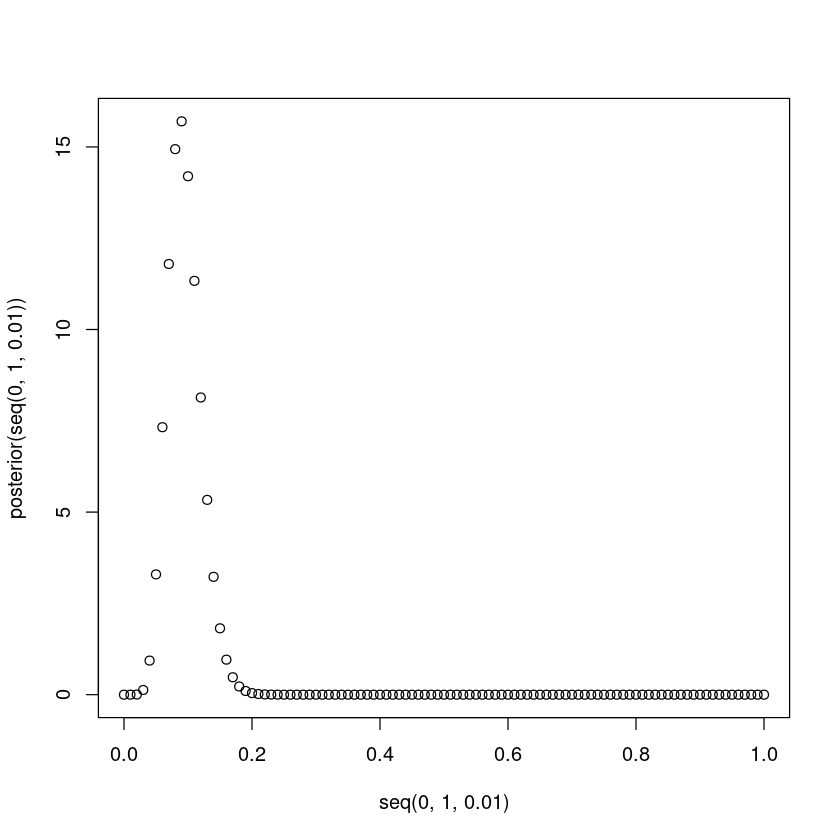

In [77]:
plot(seq(0,1,0.01), posterior(seq(0,1,0.01)))

In [79]:
message("mean ", (12)/(127))

mean 0.094488188976378



In [81]:
message("variance ", (12)*(115)/((127)*(127)*(128)))

variance 0.000668438836877674



In [80]:
find_ci95(posterior)

[1] 0.05018921 0.15083293

In bayesian approach we have p=0.1 inside the interval so we can't reject null hypothesis

In [105]:
pbinom(5,116,0.1)
1-pbinom(17,116,0.1)

[1] 0.02092518

[1] 0.04005376

Even in the frequentist approach we can't reject it

In [91]:
message("Estimator ", 9/165)

Estimator 0.0545454545454545



In [92]:
posterior = function(x){
    dbeta(x,shape1 = 12 + 9, shape2 = 115 + 165)
}

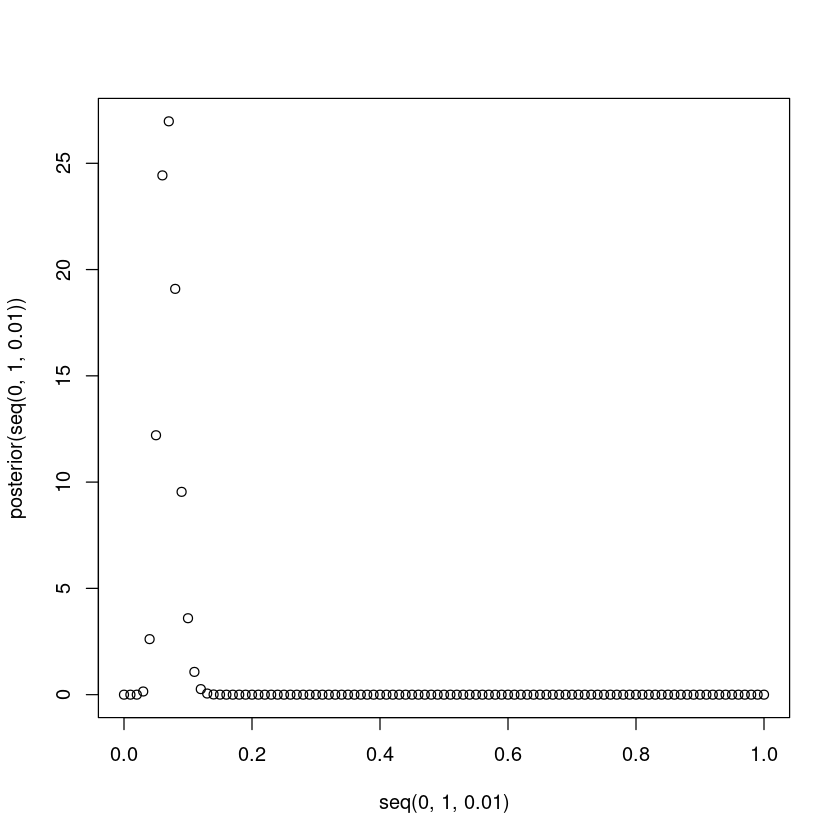

In [93]:
plot(seq(0,1,0.01), posterior(seq(0,1,0.01)))

In [95]:
message("mean ", (21)/(280))

mean 0.075



In [96]:
message("variance ", (21)*(280)/((301)*(301)*(302)))

variance 0.00021490048316792



In [97]:
find_ci95(posterior)

[1] 0.04382588 0.10109937

This time 0.1 is outside the interval so we can reject it

In [112]:
pbinom(9,165,0.1)
1-pbinom(24,165,0.1)

[1] 0.0274604

[1] 0.0236551

We can reject the null hypothesis even in the frequentist approach